In [10]:
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

In [2]:
# load feature matrix
X_min = pd.read_hdf('0_0315_4_electrodes_min.h5')
X_eff = pd.read_hdf('0_0315_4_electrodes_eff.h5')

# load target dataframe
y = pd.read_hdf('0_0315_4_electrodes_y.h5')
y = y.drop_duplicates()
y = y.set_index('window_id')
y = y.T.squeeze()
y = y.sort_index(0)

In [3]:
impute(X_min)
impute(X_eff)
X_min_filt = select_features(X_min, y)
X_eff_filt = select_features(X_eff, y)

In [4]:
X_eff_train, X_eff_test, y_train, y_test = train_test_split(X_eff_filt, y, test_size=.4)
X_min_train, X_min_test, y_train, y_test = train_test_split(X_min_filt, y, test_size=.4)

In [11]:
tree_eff = tree.DecisionTreeClassifier()
tree_eff.fit(X_eff_train, y_train)
print(classification_report(y_test, tree_eff.predict(X_eff_test)))
print(confusion_matrix(y_test, tree_eff.predict(X_eff_test)))

              precision    recall  f1-score   support

           0       0.55      0.35      0.43        17
           1       0.36      0.40      0.38        10
           2       0.27      0.40      0.32        10

    accuracy                           0.38        37
   macro avg       0.39      0.38      0.38        37
weighted avg       0.42      0.38      0.39        37

[[6 4 7]
 [2 4 4]
 [3 3 4]]


In [16]:
clf = RandomForestClassifier(n_estimators = 200, max_depth=5, random_state=0)
clf.fit(X_eff_train, y_train)
print(classification_report(y_test, clf.predict(X_eff_test)))
print(confusion_matrix(y_test, clf.predict(X_eff_test)))

              precision    recall  f1-score   support

           0       0.67      0.24      0.35        17
           1       0.21      0.30      0.25        10
           2       0.35      0.60      0.44        10

    accuracy                           0.35        37
   macro avg       0.41      0.38      0.35        37
weighted avg       0.46      0.35      0.35        37

[[4 8 5]
 [1 3 6]
 [1 3 6]]


In [20]:
tree_min = tree.DecisionTreeClassifier()
tree_min.fit(X_min_train, y_train)
print(classification_report(y_test, tree_min.predict(X_min_test)))
print(confusion_matrix(y_test, tree_min.predict(X_min_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.92        37
   macro avg       0.90      0.90      0.90        37
weighted avg       0.92      0.92      0.92        37

[[17  0  0]
 [ 0  9  1]
 [ 0  2  8]]


In [21]:
clf = RandomForestClassifier(n_estimators = 200, max_depth=5, random_state=0)
clf.fit(X_min_train, y_train)
print(classification_report(y_test, clf.predict(X_min_test)))
print(confusion_matrix(y_test, clf.predict(X_min_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.92        37
   macro avg       0.90      0.90      0.90        37
weighted avg       0.92      0.92      0.92        37

[[17  0  0]
 [ 0  9  1]
 [ 0  2  8]]


In [9]:
df_min = pd.concat([X_min_filt, y], axis = 1)
# FEATURE IMPORTANCE
# PLOTS NEEDED
# distribution of each feature for different y
import seaborn as sns
import matplotlib.pyplot as plt

[Text(167.4, 199.32, 'X[4] <= 132.053\ngini = 0.664\nsamples = 54\nvalue = [16, 20, 18]'),
 Text(83.7, 163.07999999999998, 'X[7] <= 52.554\ngini = 0.5\nsamples = 33\nvalue = [16, 17, 0]'),
 Text(41.85, 126.83999999999999, 'gini = 0.0\nsamples = 17\nvalue = [0, 17, 0]'),
 Text(125.55000000000001, 126.83999999999999, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0]'),
 Text(251.10000000000002, 163.07999999999998, 'X[3] <= 28572.215\ngini = 0.245\nsamples = 21\nvalue = [0, 3, 18]'),
 Text(209.25, 126.83999999999999, 'X[10] <= 47.501\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(167.4, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(251.10000000000002, 90.6, 'X[0] <= 359.229\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(209.25, 54.359999999999985, 'X[5] <= 34.908\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(167.4, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(251.10000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue =

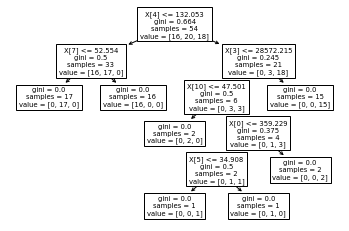

In [31]:
tree.plot_tree(tree_min)

/home/kartikey/anaconda3/envs/ts/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/kartikey/anaconda3/envs/ts/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/kartikey/anaconda3/envs/ts/lib/python3.8/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


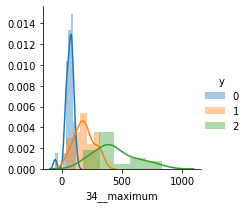

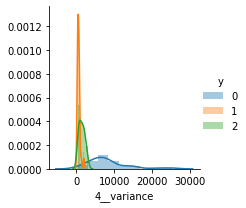

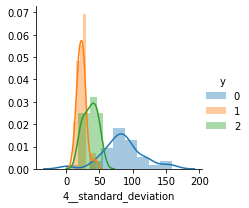

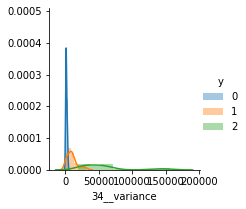

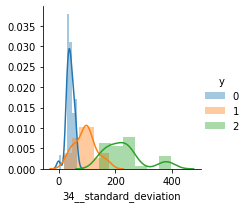

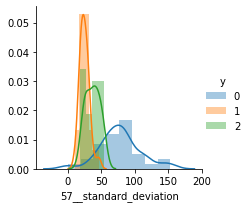

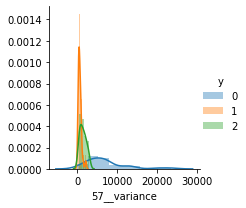

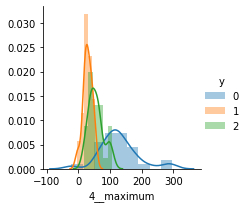

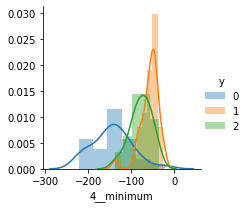

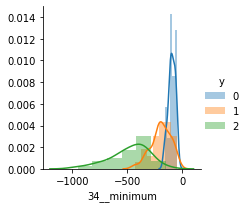

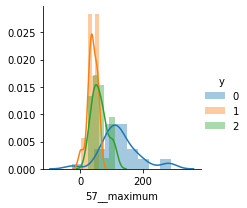

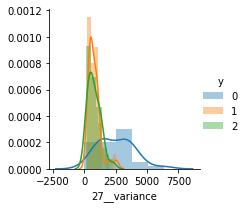

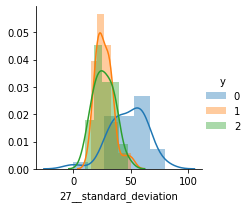

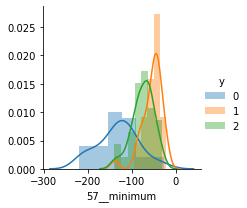

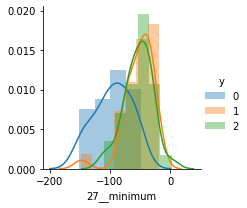

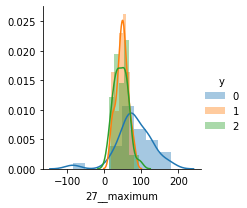

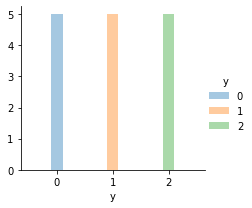

In [29]:
for cols in df_min.columns:
    g = sns.FacetGrid(df_min, hue='y')
    g.map(sns.distplot, cols)
    g.add_legend();